In [1]:
import sys
sys.path.insert(0, '/data/origami/niusha/code/local-experiment')
import helper
import pathlib
import importlib
import numpy as np
import seaborn as sns
from nilearn.image import load_img, iter_img, index_img, concat_imgs

In [2]:
FSL_ICs = load_img("/data/origami/niusha/out/ica_original_maps/melodic_IC.nii.gz")

In [3]:
FSL_ICs.shape

(101, 119, 97, 30)

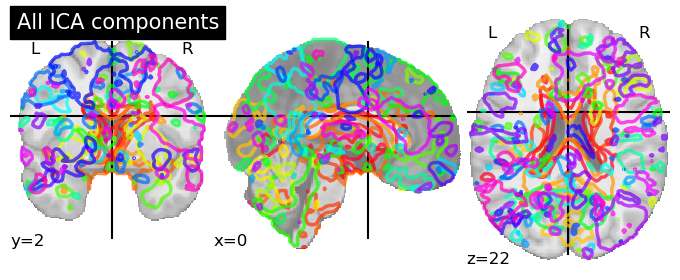

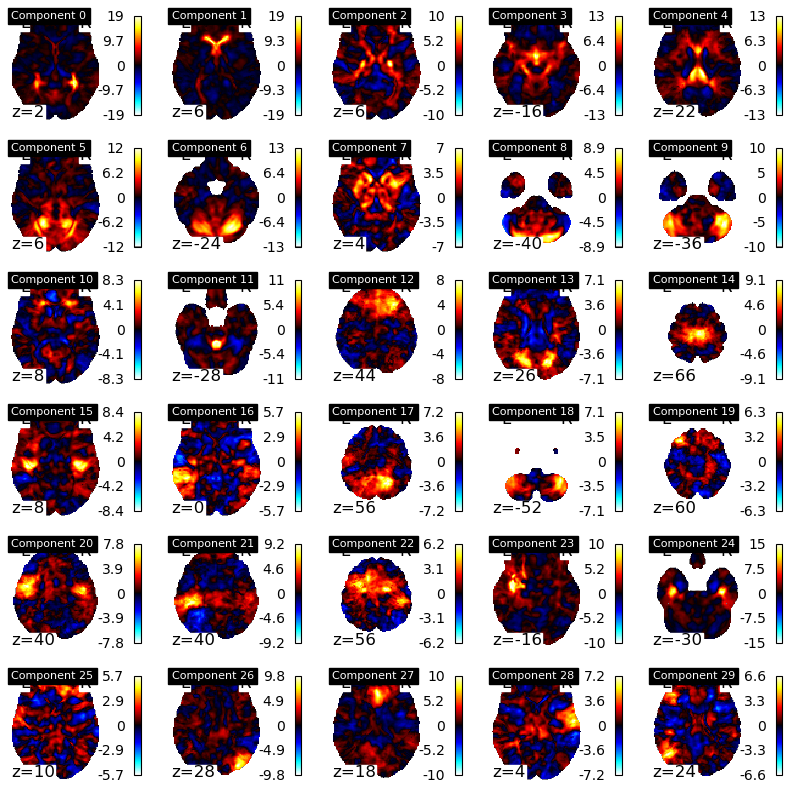

In [4]:
helper.plot_ICA_components(FSL_ICs)

In [5]:
importlib.reload(helper)

<module 'helper' from '/data/origami/niusha/code/local-experiment/helper.py'>

     ======== General Information ========
Number of nan voxels: 0
Overall Maximum: 19.3174
Overall Minimum: -6.9235
Overall Mean: 0.0336
Overall Variance: 0.3296


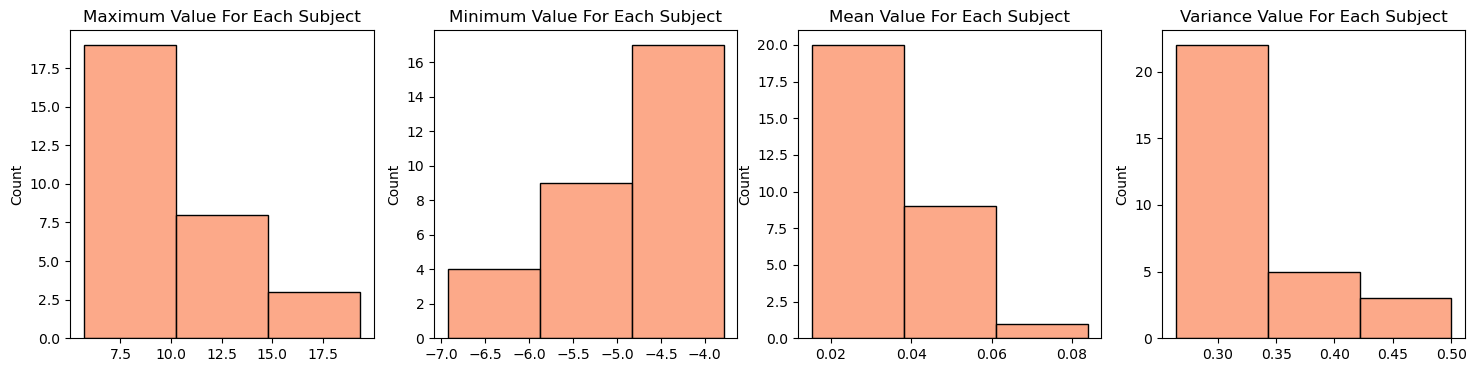

In [6]:
helper.image_report(FSL_ICs)

In [7]:
data = FSL_ICs.get_fdata()
data[data < 3] = 0
d = np.ravel(data)

<Axes: ylabel='Count'>

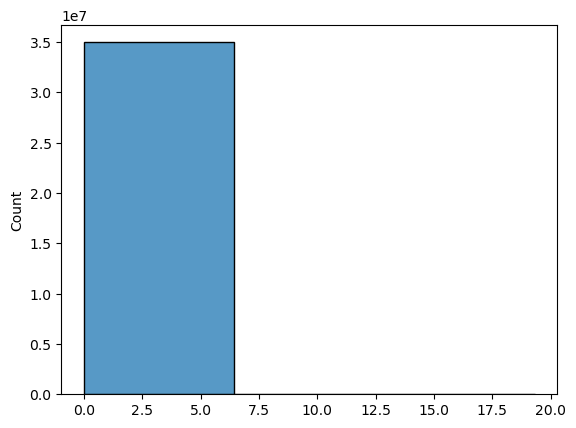

In [8]:
sns.histplot(data=d,bins=3)

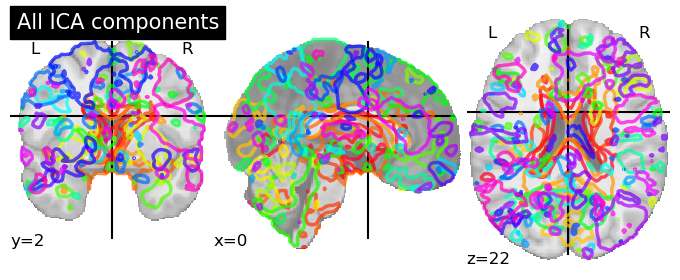

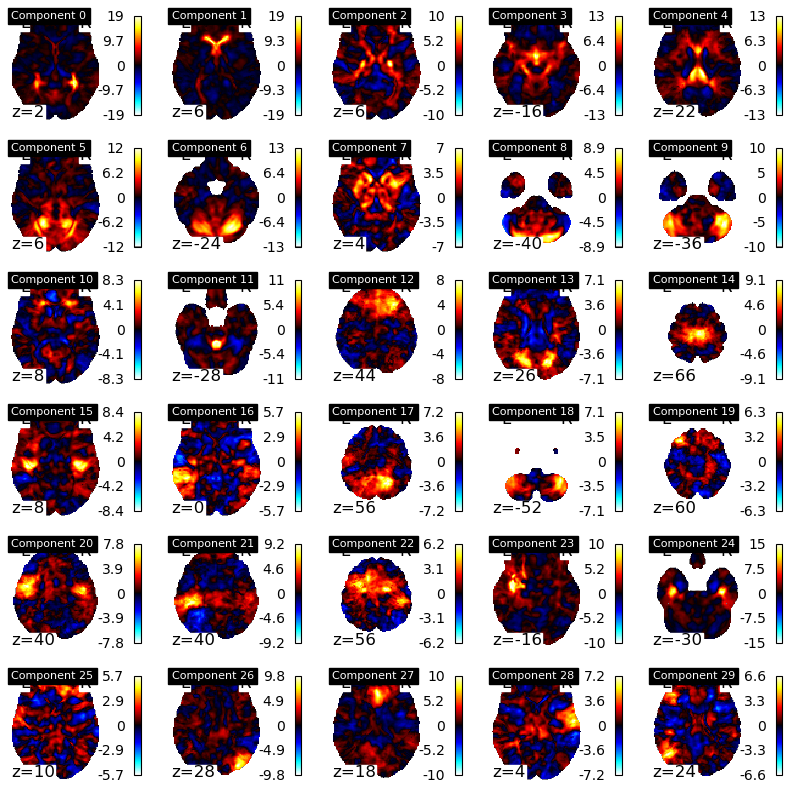

In [9]:
helper.plot_ICA_components(FSL_ICs)

     ======== General Information ========
Number of nan voxels: 0
Overall Maximum: 19.3174
Overall Minimum: 0.0000
Overall Mean: 0.0202
Overall Variance: 0.1006


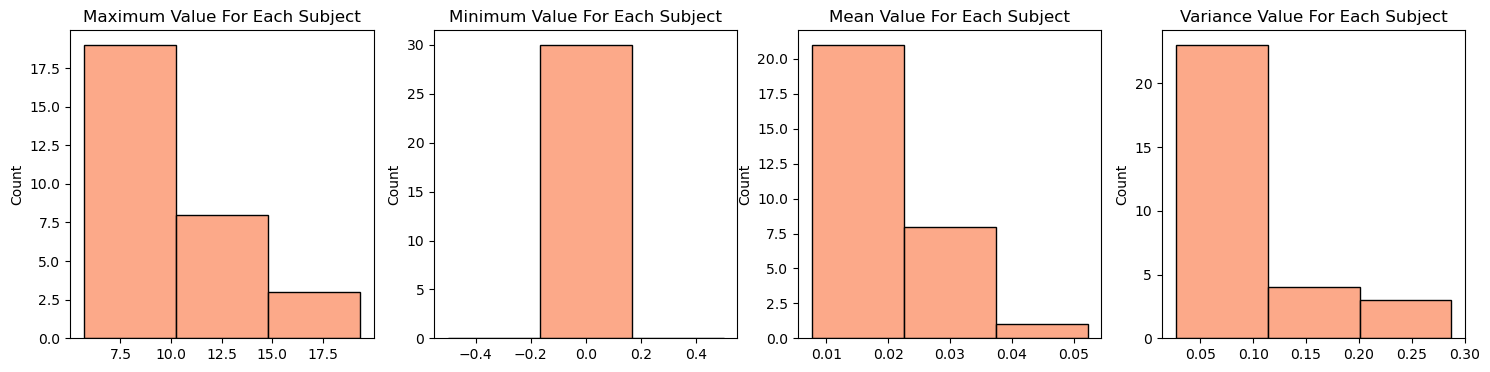

In [10]:
helper.image_report(FSL_ICs)

In [11]:
FSL_ICs_or = load_img("/data/origami/niusha/out/ica_original_maps/melodic_oIC.nii.gz")

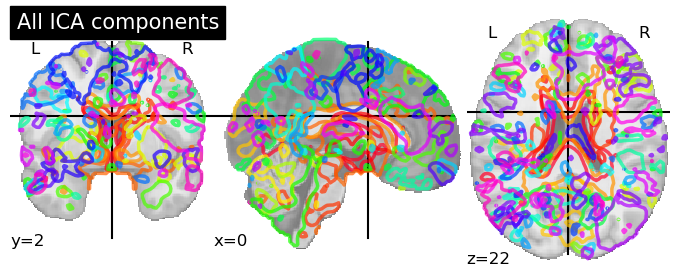

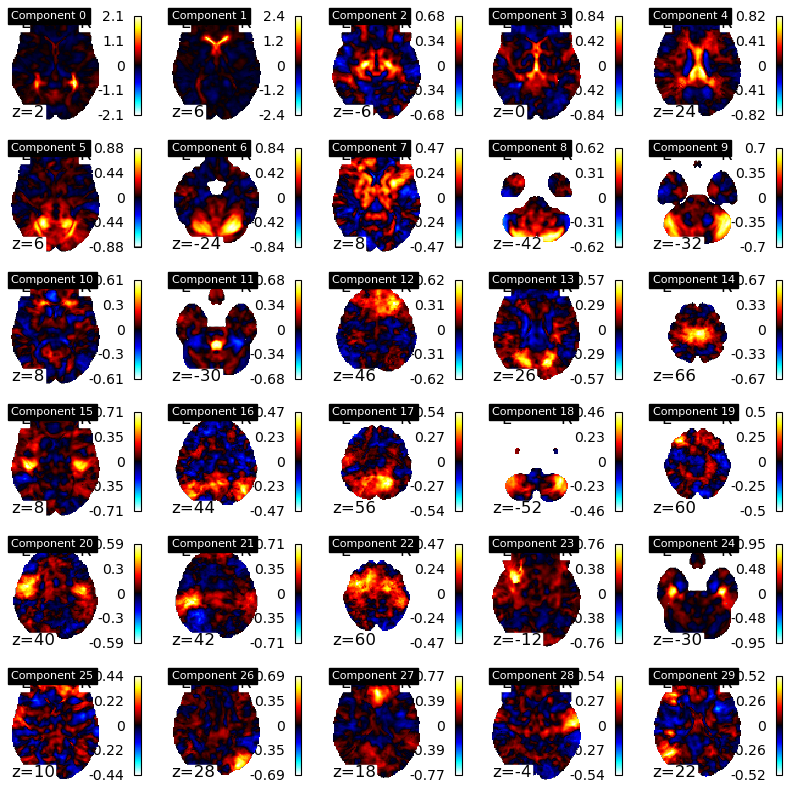

In [12]:
helper.plot_ICA_components(FSL_ICs_or)

     ======== General Information ========
Number of nan voxels: 0
Overall Maximum: 2.3755
Overall Minimum: -0.4922
Overall Mean: 0.0018
Overall Variance: 0.0020


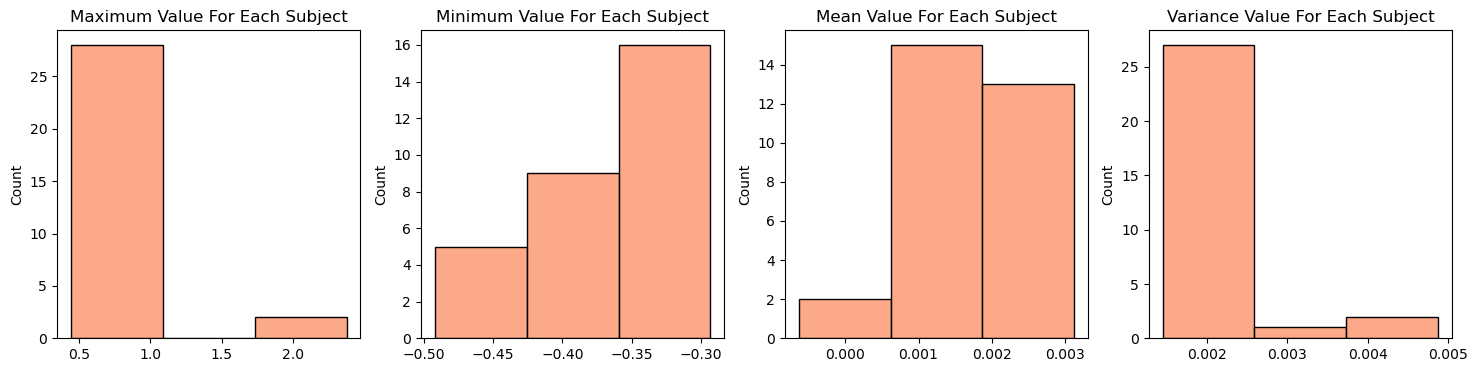

In [13]:
helper.image_report(FSL_ICs_or)

In [14]:
List_of_masks = []
path = pathlib.Path("/data/origami/niusha/out/ica_original_thr_z_3/stats/")
for i in range(1,31):
    List_of_masks.append(index_img(load_img(path / f"thresh_zstat{i}.nii.gz"),1))

masks = concat_imgs(List_of_masks)

In [15]:
len(List_of_masks)

30

In [16]:
masks.shape

(101, 119, 97, 30)

In [72]:
z = [-28, -10, 4, 16, 32, 54, 68]

In [18]:
imgs = index_img(masks,slice(6,9))

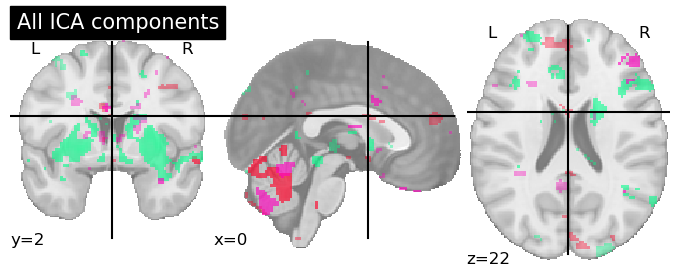

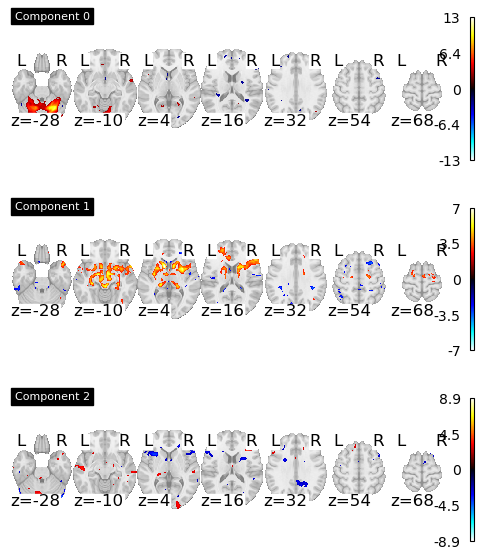

In [73]:
helper.plot_ICA_components(imgs, n_cols=1, z_slice=z)

     ======== General Information ========
Number of nan voxels: 0
Overall Maximum: 19.3174
Overall Minimum: -6.9235
Overall Mean: 0.0184
Overall Variance: 0.1343


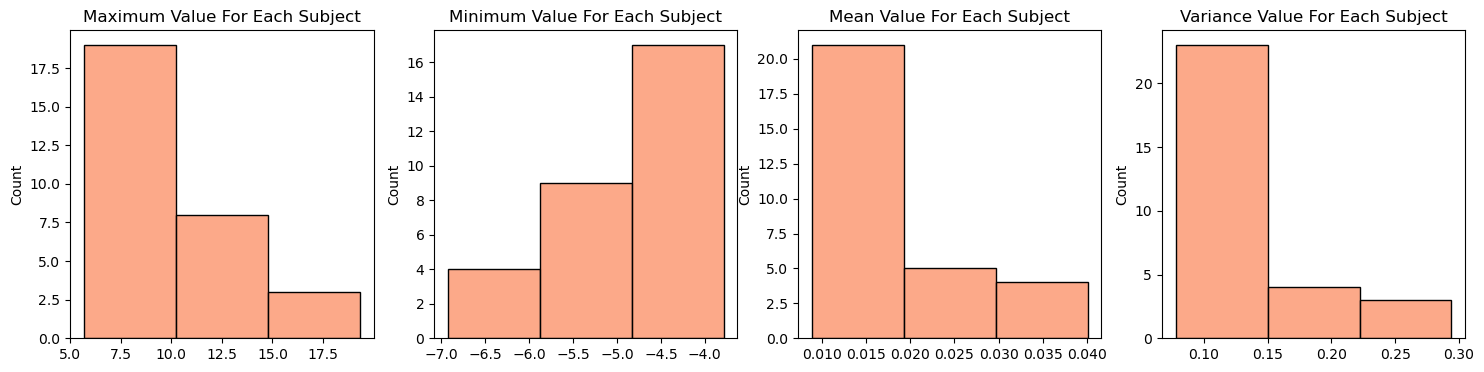

In [20]:
helper.image_report(masks)

In [21]:
List_of_masks_or = []
path_or = pathlib.Path("/data/origami/niusha/out/ica_original_maps/stats/")
for i in range(1,31):
    List_of_masks_or.append(load_img(path / f"thresh_zstat{i}.nii.gz"))

masks_or = concat_imgs(List_of_masks)

In [22]:
imgs_or = index_img(masks_or,slice(6,9))

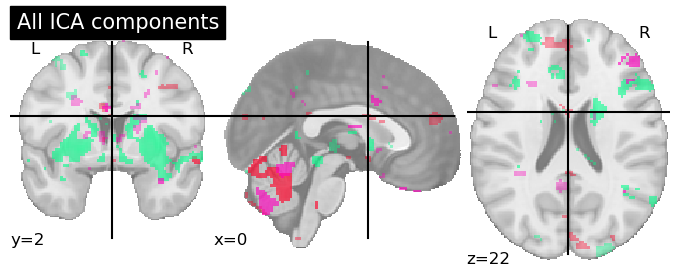

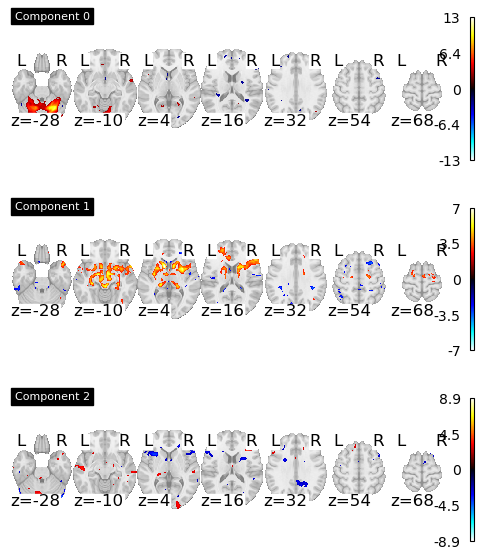

In [74]:
helper.plot_ICA_components(imgs_or, n_cols=1, z_slice=z)

<Figure size 300x1000 with 0 Axes>

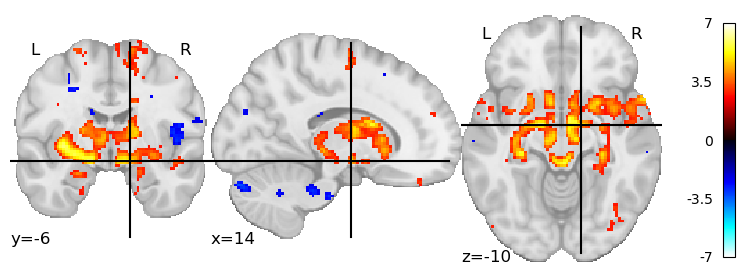

In [79]:
import matplotlib.pyplot as plt
from nilearn.plotting import plot_stat_map 

plt.figure(figsize=(3,10))
plot_stat_map(index_img(masks, 7), cut_coords=(14, -6, -10))

<Figure size 300x1000 with 0 Axes>

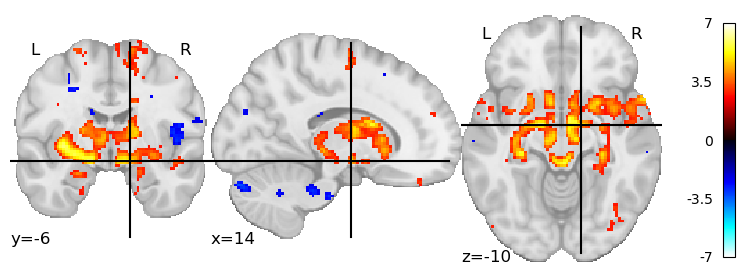

In [78]:
plt.figure(figsize=(3,10))
plot_stat_map(index_img(masks_or, 7), cut_coords=(14, -6, -10))

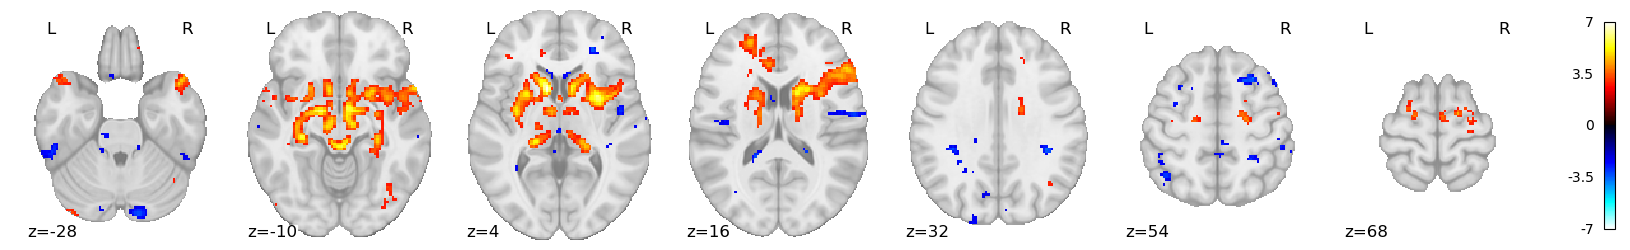

In [76]:
plot_stat_map(index_img(masks, 7), display_mode="z", cut_coords=z)

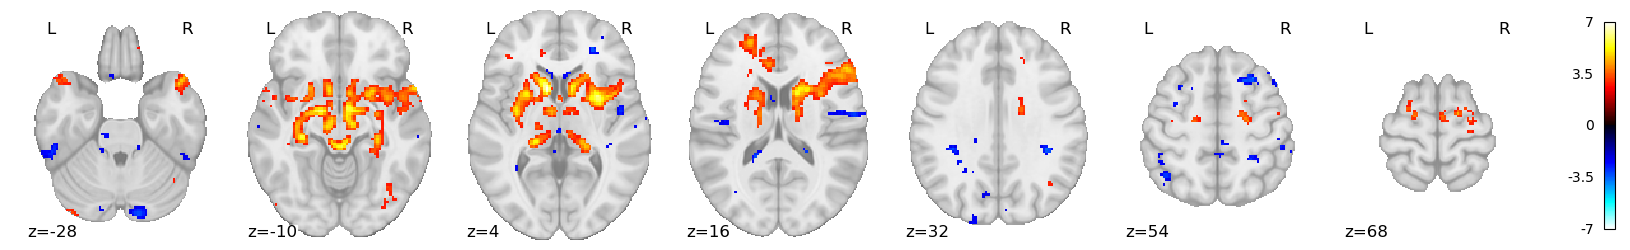

In [77]:
plot_stat_map(index_img(masks_or, 7), display_mode="z", cut_coords=z)

In [28]:
data_7 = index_img(masks, 7).get_fdata()
data_7_or = index_img(masks_or, 7).get_fdata()

In [81]:
np.corrcoef(np.ravel(data_7), np.ravel(data_7_or))

array([[1., 1.],
       [1., 1.]])

In [29]:
np.sum(np.isclose(data_7, data_7_or))

1165843

In [30]:
len(np.ravel(data_7))

1165843

In [31]:
len(np.ravel(np.equal(data_7, data_7_or)))

1165843

In [61]:
FSL_ICs = load_img("/data/origami/niusha/out/ica_original_maps/melodic_IC.nii.gz")

In [32]:
Ni_ICs = load_img("/data/origami/niusha/code/local-experiment/io/whole_original_data/ICAs/ICAs_whole_original.nii.gz")

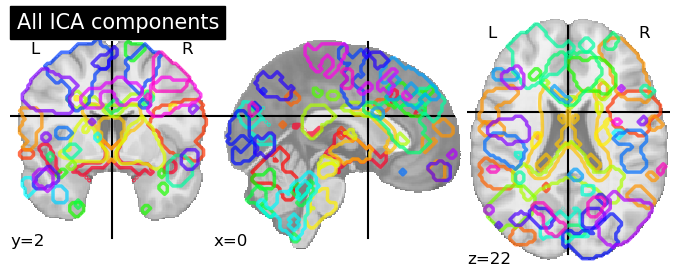

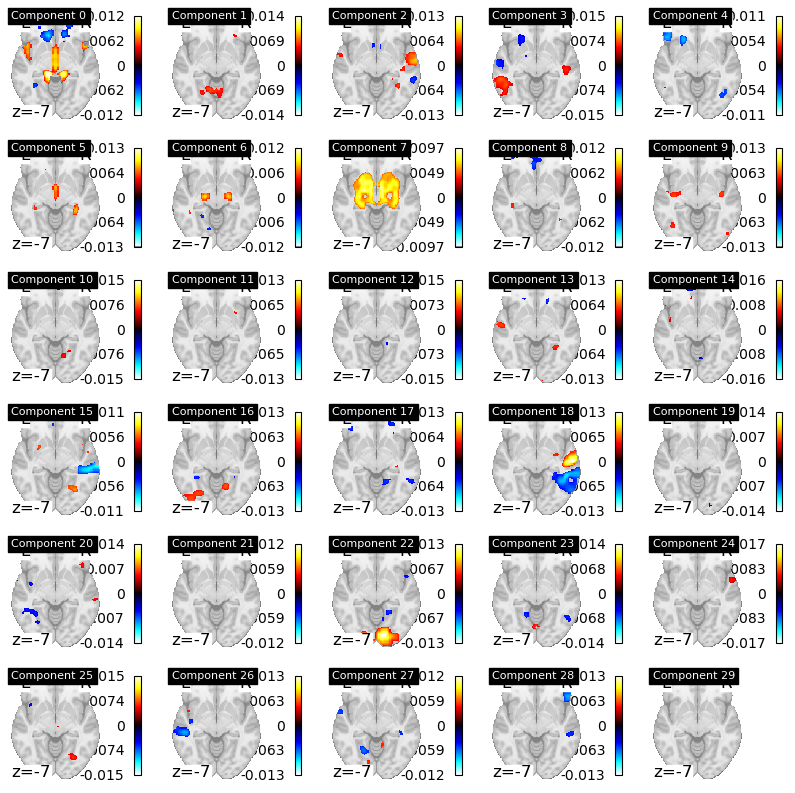

In [33]:
helper.plot_ICA_components(Ni_ICs, z_slice=[-7])

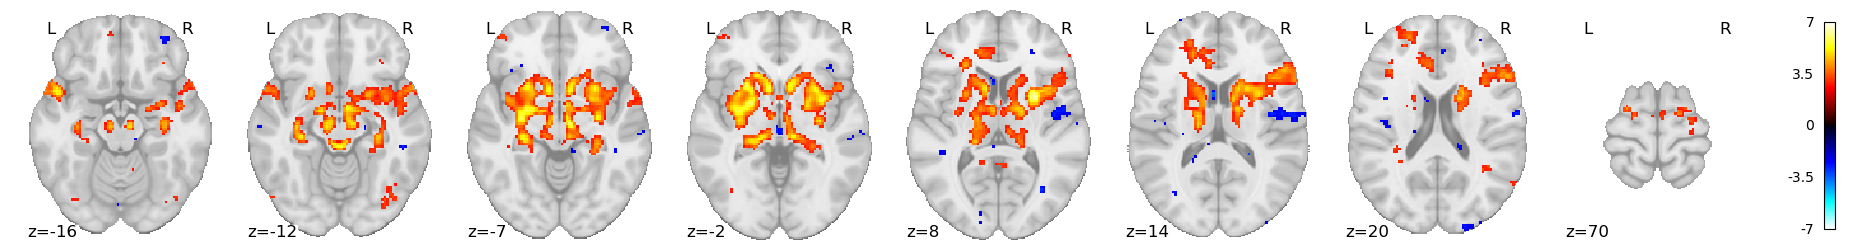

In [34]:
plot_stat_map(index_img(masks, 7), cut_coords=z, display_mode="z")

In [35]:
import numpy as np

In [62]:
FSL_data = FSL_ICs.get_fdata()
Ni_data = Ni_ICs.get_fdata()

In [63]:
a = np.nanmax(FSL_data, axis=(0,1,2))
a.shape

(30,)

In [64]:
var = np.var(FSL_data, axis=(0,1,2))
var.shape

(30,)

In [65]:
FSL_data_re = np.reshape(FSL_data, newshape=[-1,30])
Ni_data_re = np.reshape(Ni_data, newshape=[-1,30])

In [66]:
idx = (FSL_data_re >= 3.0)

In [67]:
np.sum(idx[...,1])/len(np.ravel(idx[...,1]))

0.004309328099924261

In [68]:
import matplotlib.pyplot as plt

In [69]:
IC_corr = np.zeros((30,30))
for i in range(30):   
    for j in range(30):
        if j <= i:
            IC_corr[i,j] = np.corrcoef(FSL_data_re[:,i],Ni_data_re[:,j])[0,1]

In [70]:
import seaborn as sns

Text(283.22222222222223, 0.5, 'Nilearn')

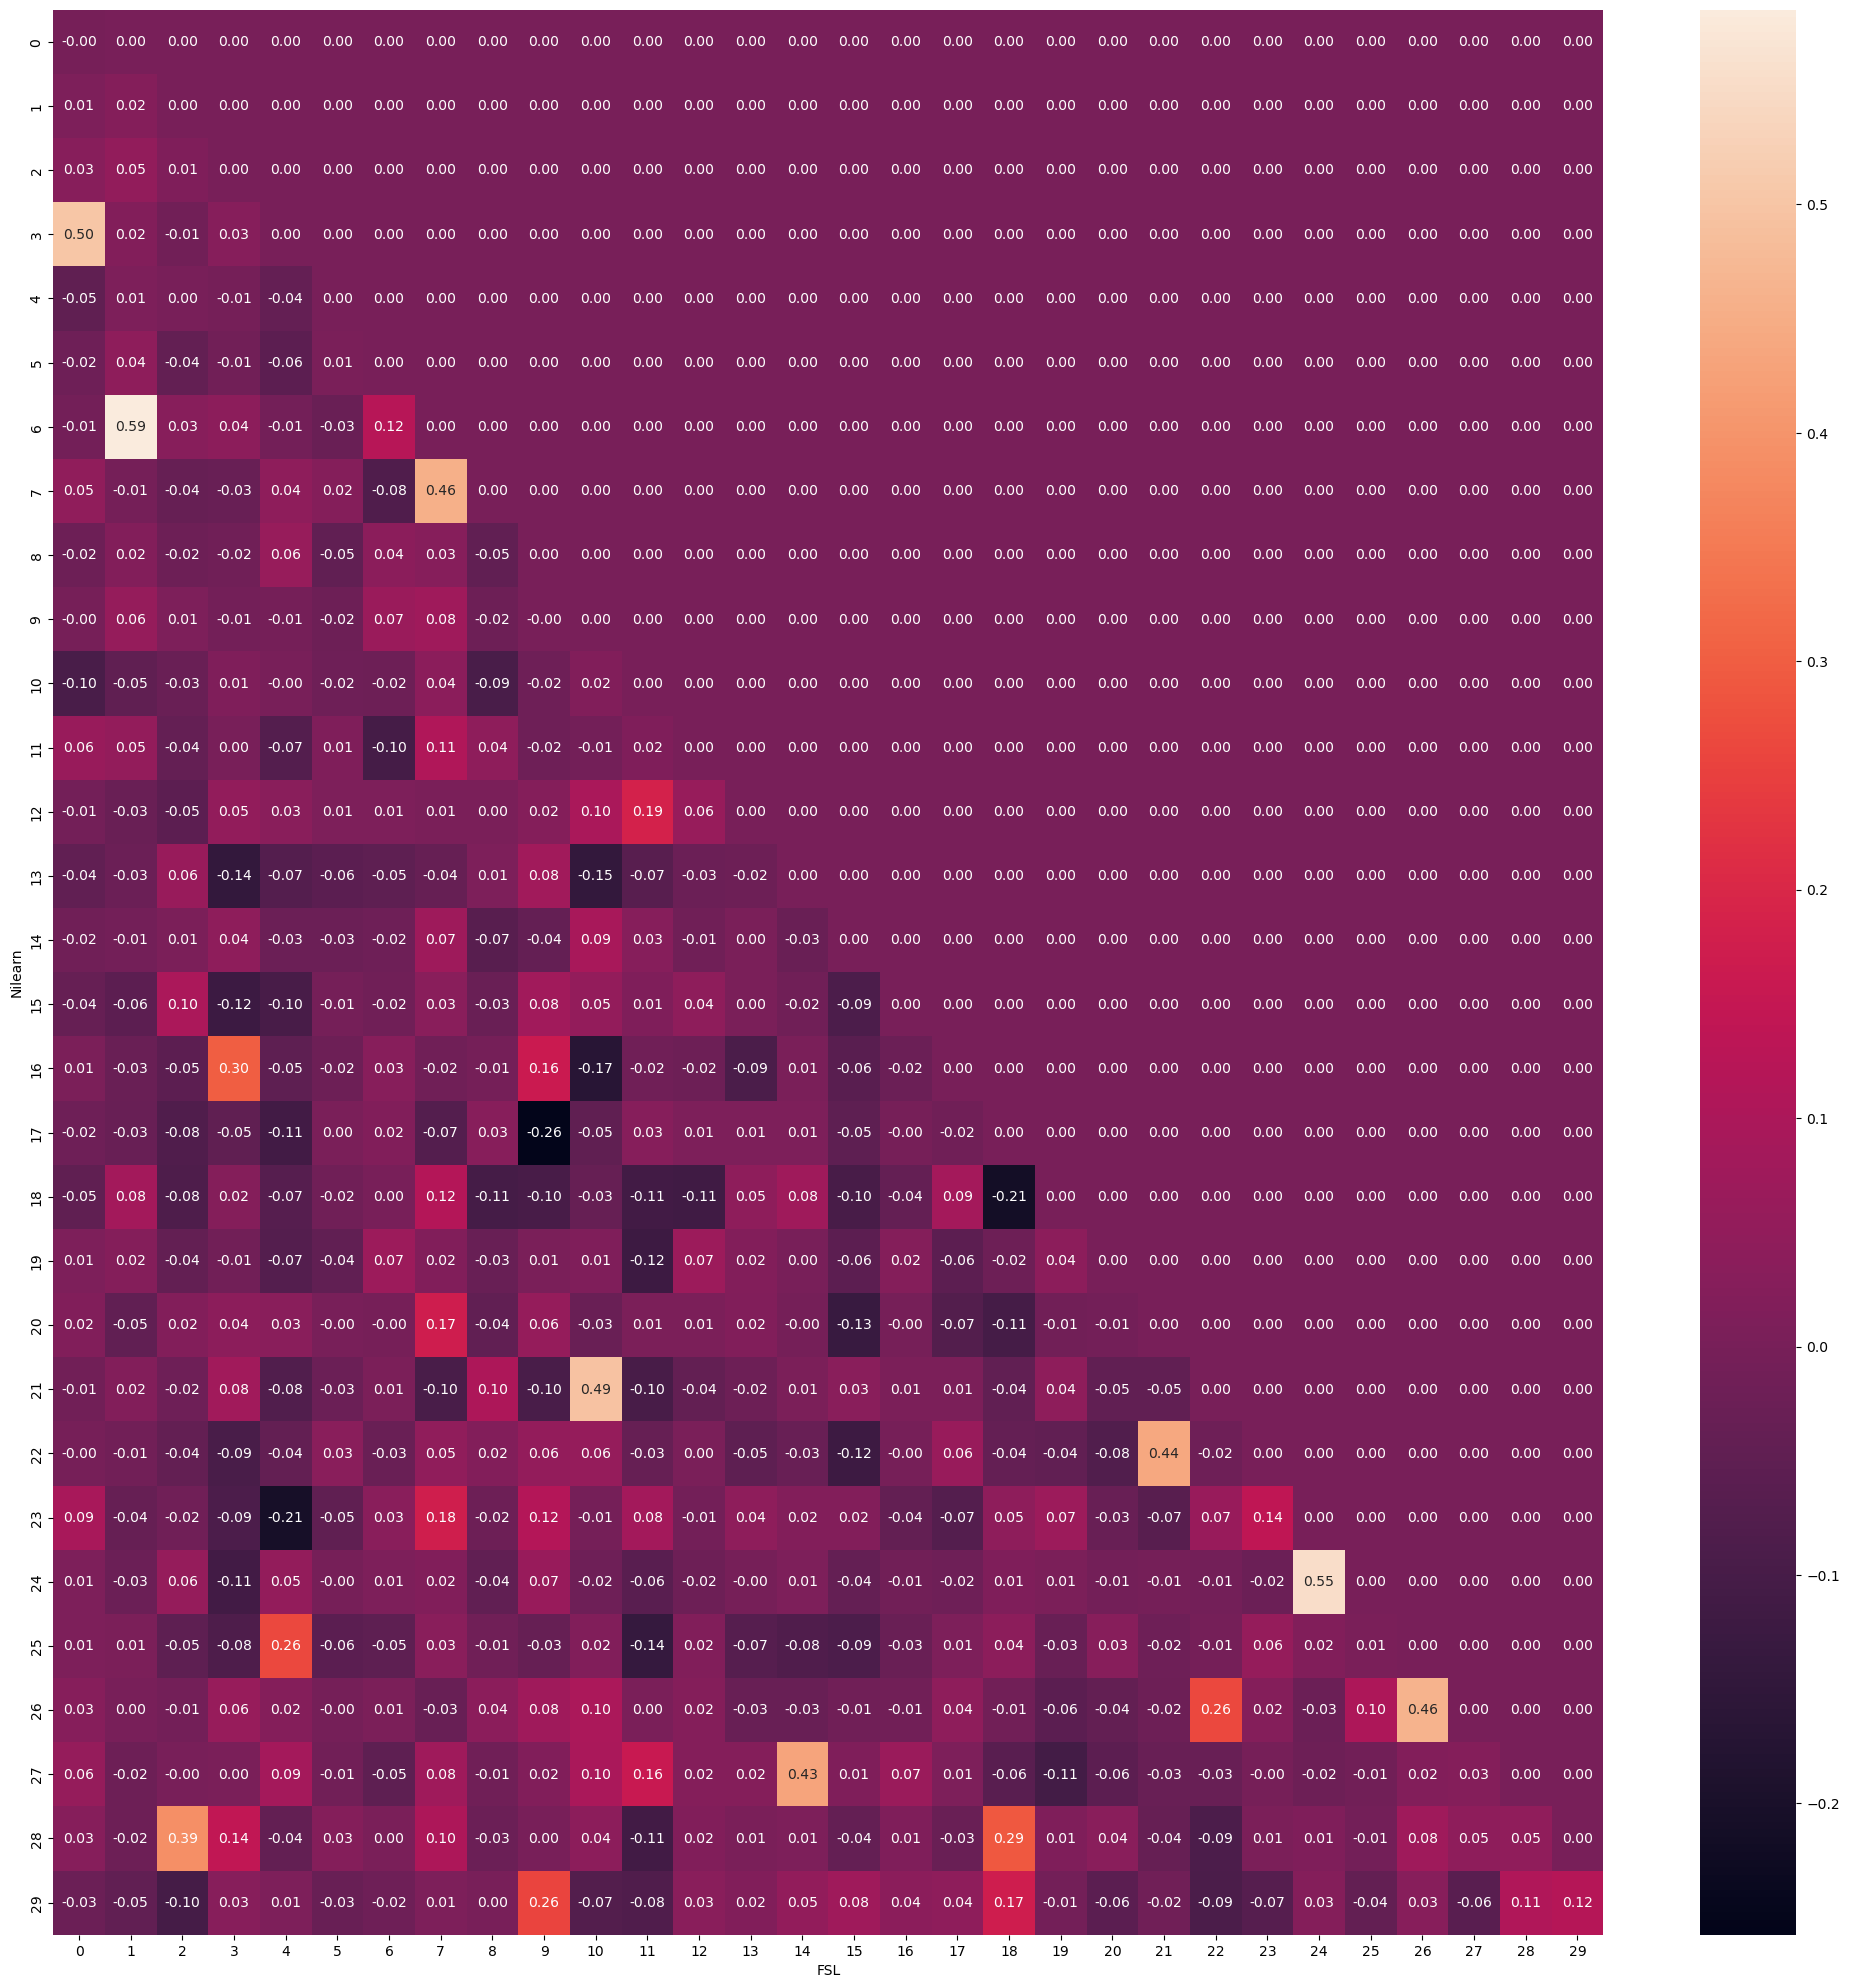

In [71]:
plt.figure(figsize=(25,25))
ax = sns.heatmap(IC_corr, annot=True, fmt=".2f")
plt.xlabel("FSL")
plt.ylabel("Nilearn")

In [82]:
FSL_thr_data_re = np.reshape(masks_or.get_fdata(),  newshape=[-1,30])

In [83]:
IC_corr = np.zeros((30,30))
for i in range(30):   
    for j in range(30):
        if j <= i:
            IC_corr[i,j] = np.corrcoef(FSL_thr_data_re[:,i],Ni_data_re[:,j])[0,1]

Text(283.22222222222223, 0.5, 'Nilearn')

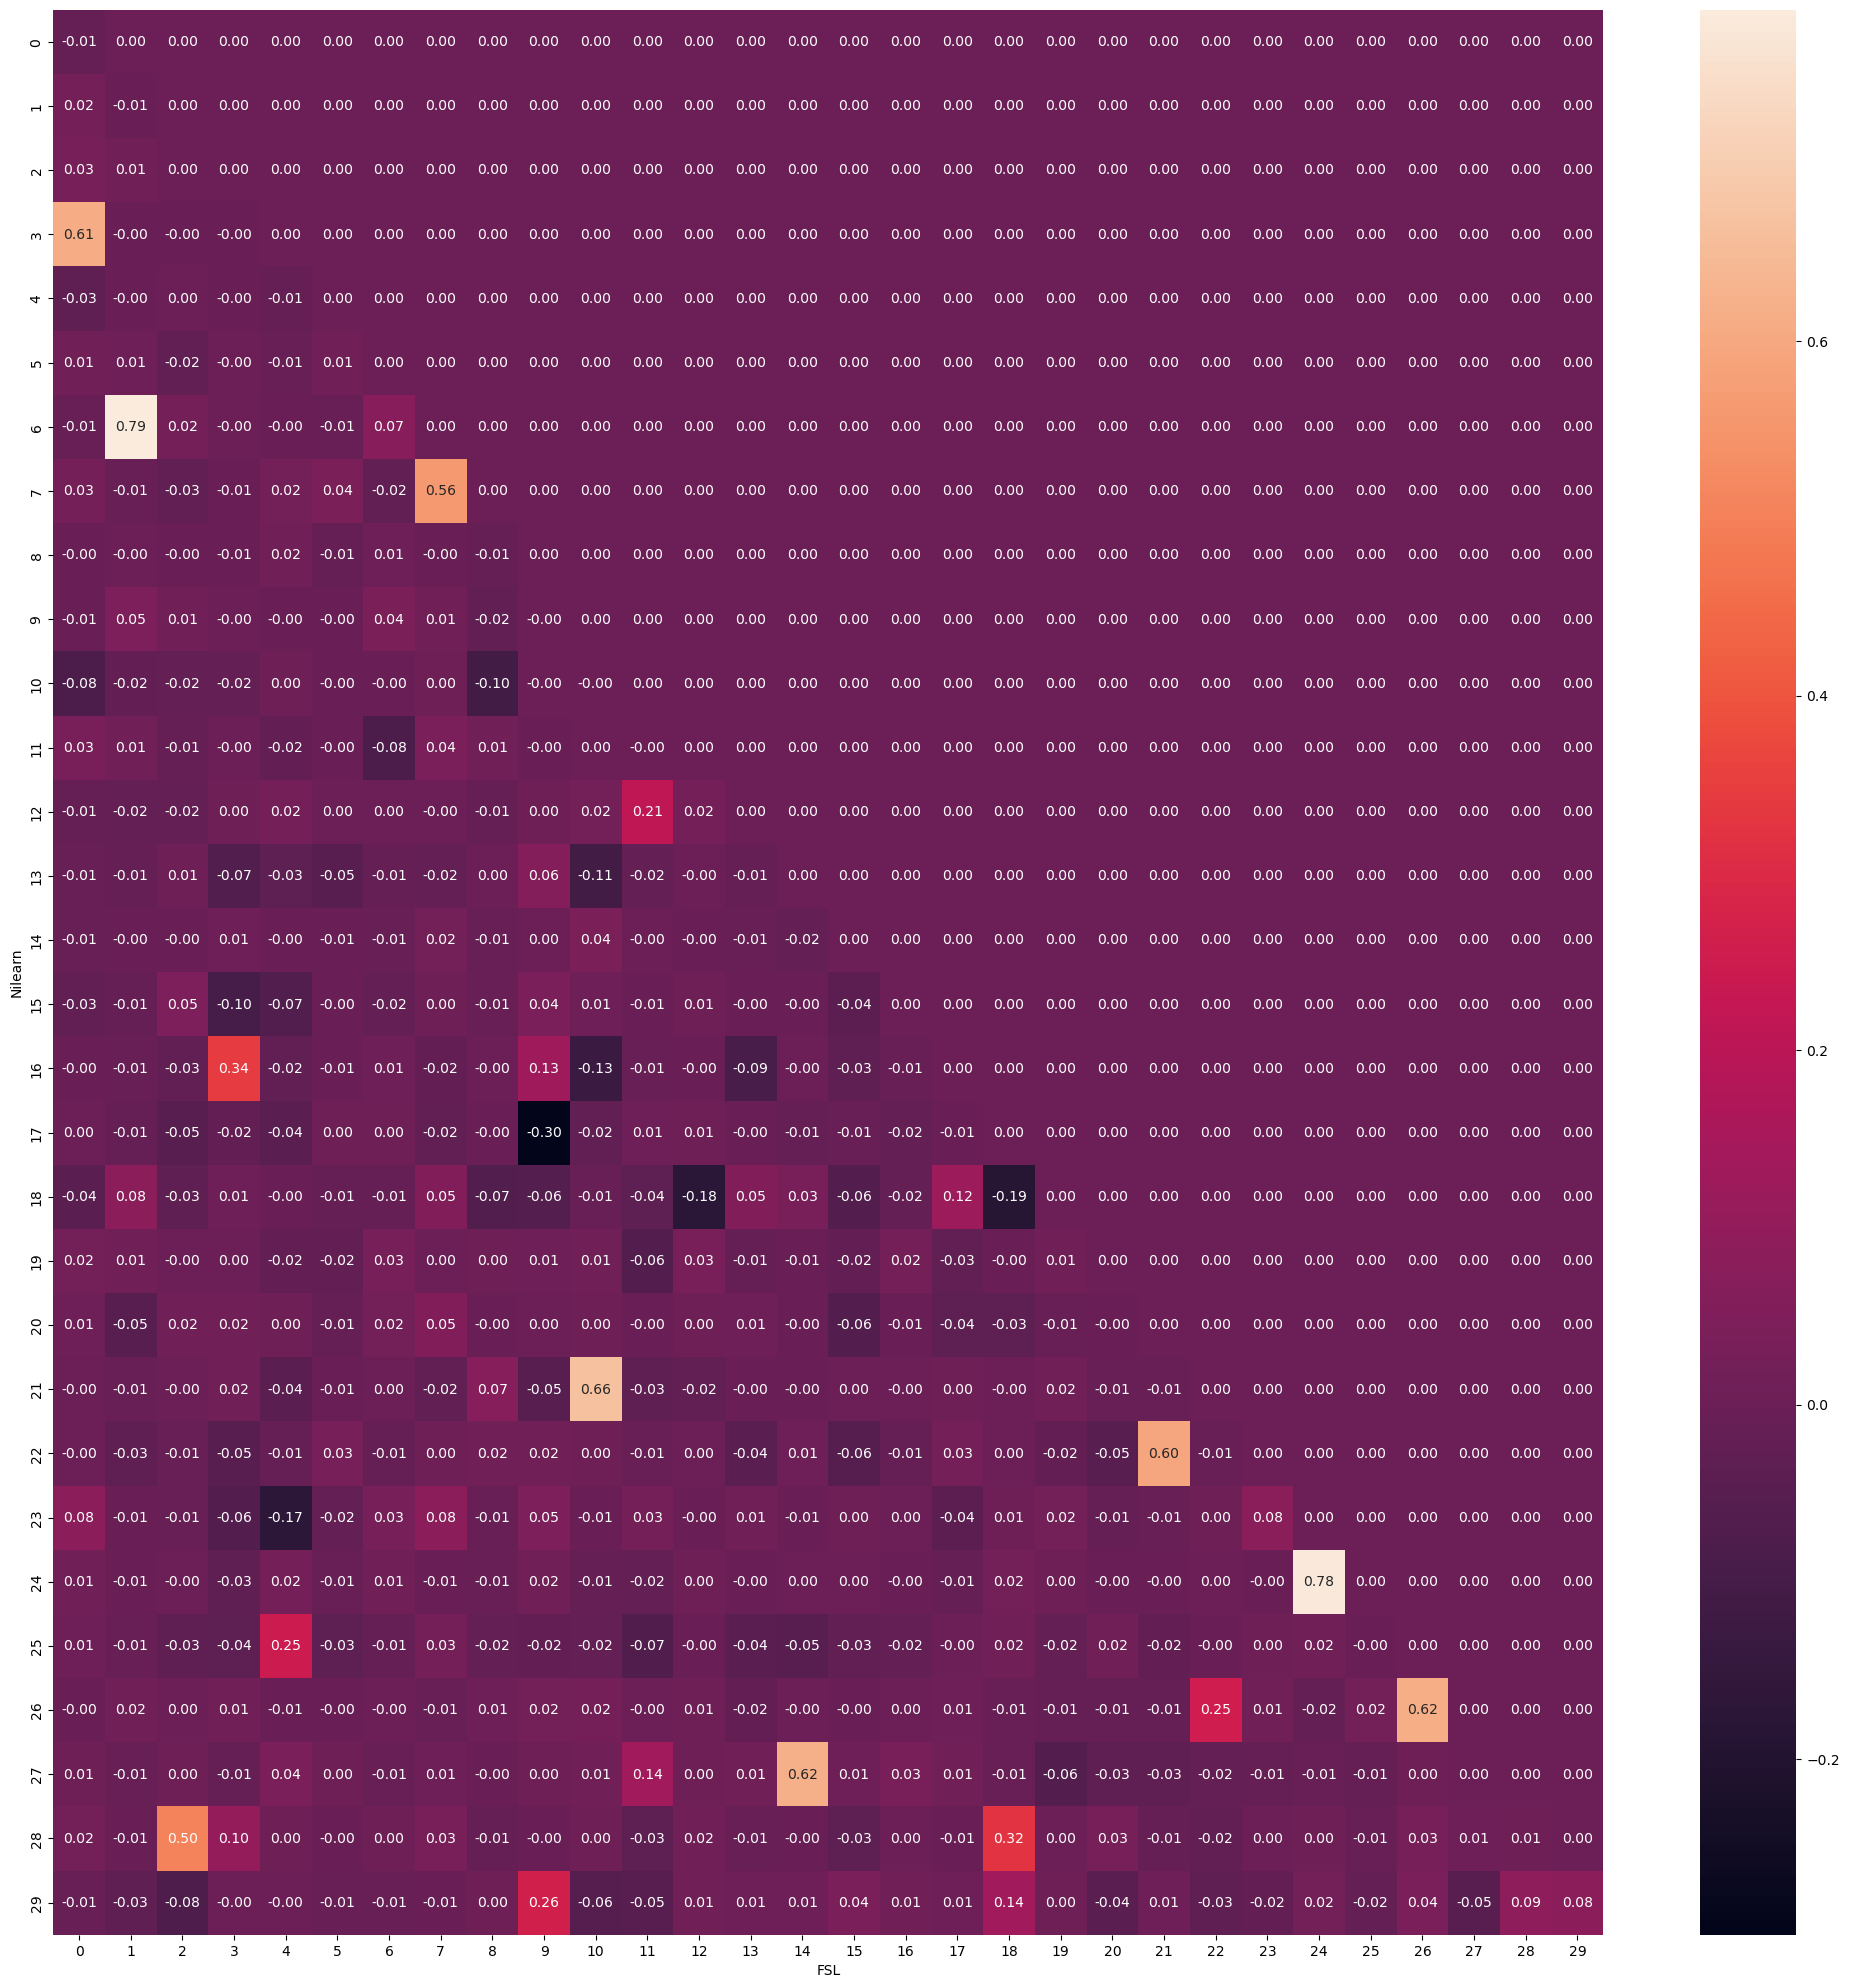

In [84]:
plt.figure(figsize=(25,25))
ax = sns.heatmap(IC_corr, annot=True, fmt=".2f")
plt.xlabel("FSL")
plt.ylabel("Nilearn")

In [46]:
# plt.plot(IC1_corr)

In [47]:
t_modes = np.loadtxt("/data/origami/niusha/out/ica_original_maps/melodic_Tmodes")

In [48]:
t_modes.shape

(349, 30)

In [49]:
import pandas as pd

In [50]:
subject_df = pd.read_csv("/data/origami/niusha/input/subject_IDs.csv")

N = len(subject_df.ID)
ID_map = dict(zip(range(N),subject_df.ID))

Healthy_index = np.where(subject_df.PD == 0)
Healthy_subject = subject_df.ID.iloc[Healthy_index]

PD_index = np.where(subject_df.PD == 1)
PD_subject = subject_df.ID.iloc[PD_index]

In [51]:
PD_tmodes = t_modes[PD_index][:]
Healthy_tmodes = t_modes[Healthy_index][:]

In [52]:
PD_tmodes.shape

(232, 30)

In [53]:
Healthy_tmodes.shape


(117, 30)

In [54]:
from scipy.stats import ttest_ind

In [55]:
Tstat = np.zeros((1,30))
Pval = np.zeros((1,30))

In [56]:
for i in range(30):
    Tstat[0,i], Pval[0,i] = ttest_ind(Healthy_tmodes[:,i], PD_tmodes[:,i])

In [57]:
idx_p = np.argmin(Pval)
idx_p

7

In [58]:
idx_t = np.argmax(Tstat)
idx_t

7

In [59]:
Tstat[0,5]

1.3862878159758916

In [60]:
Pval[0,5]

0.16654912695765106